In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [5]:
iss = []
Vs = []
nus = np.array([20,50,100,500])
for j in nus:
    data = pd.read_csv(f'CV_{j} mV_Ferri_ferro.txt',sep = ';')
    i = data['WE(1).Current (A)'].values
    sum_i = max(i) + abs(min(i))

    iss.append(i + sum_i/2 - max(i))
    V = data['Potential applied (V)'].values
    Vs.append(V)
#nus[-1] = 5000

O que normalmente fariamos seria uasr função para achar pico, porém como o perfil está um pouco diferente do ideal, irei focar no valor de maior corrente na região próxima de onde é o pico

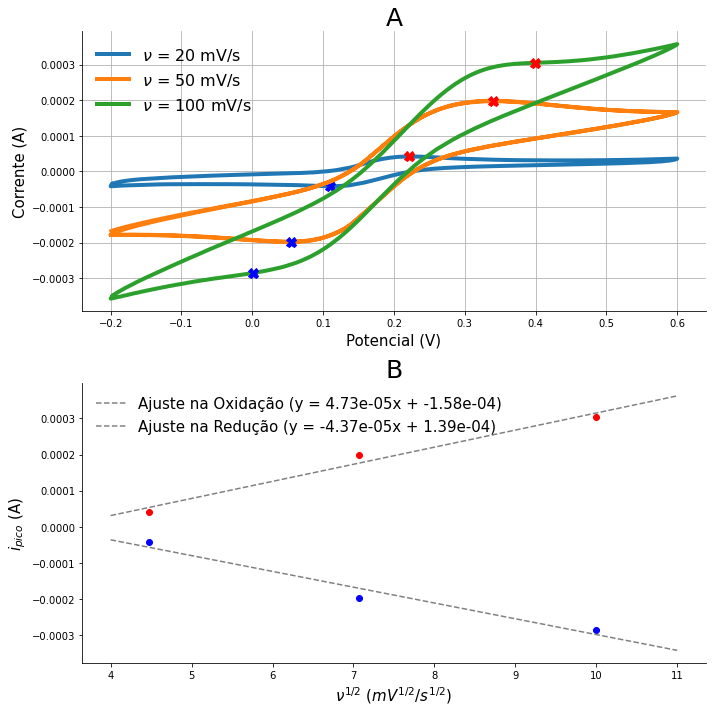

In [9]:
# Plotagem do ajuste polinomial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

i_max_ox = []
i_min_red = []

V_min = 0
V_max = 0.4

for u in range(len(nus)-1):
    V = np.array(Vs[u])
    i = np.array(iss[u])
    ax1.plot(V, i, lw=4, label=f'$\\nu$ = {nus[u]} mV/s')

    # Filtrar os dados dentro do intervalo de potencial
    mask = (V >= V_min) & (V <= V_max)
    V_filtered = V[mask]
    i_filtered = i[mask]

    # Encontrar o valor máximo e mínimo de corrente no intervalo
    if len(i_filtered) > 0:
        max_ox = max(i_filtered)  # Máximo de corrente (oxidação)
        min_red = min(i_filtered)  # Mínimo de corrente (redução)
        
        i_max_ox.append(max_ox)
        i_min_red.append(min_red)

        # Plotar os pontos máximos e mínimos
        ax1.plot(V_filtered[np.argmax(i_filtered)], max_ox, 'X', color='red', markersize=10)
        ax1.plot(V_filtered[np.argmin(i_filtered)], min_red, 'X', color='blue', markersize=10)

ax1.set_ylabel('Corrente (A)',fontsize = 15)
ax1.set_xlabel('Potencial (V)',fontsize = 15)
ax1.grid(True)
ax1.legend(loc='upper left', frameon=False,fontsize=16)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_title('A',fontsize=25)


ax2.plot(nus[:-1]**(1/2), i_max_ox, 'o', color='red')
degree = 1  # Grau do polinômio
coeffs1 = np.polyfit(nus[:-1]**(1/2), i_max_ox, degree)
x_range = np.linspace(4,11,100)
y_fit_ox = np.polyval(coeffs1, x_range)
ax2.plot(x_range, y_fit_ox, '--', color='gray', label=f'Ajuste na Oxidação (y = {coeffs1[0]:.2e}x + {coeffs1[1]:.2e})')

ax2.plot(nus[:-1]**(1/2), i_min_red, 'o',color='blue')
coeffs2 = np.polyfit(nus[:-1]**(1/2), i_min_red, degree)
y_fit_re = np.polyval(coeffs2, x_range)
ax2.plot(x_range, y_fit_re, '--', color='gray',label=f'Ajuste na Redução (y = {coeffs2[0]:.2e}x + {coeffs2[1]:.2e})')
ax2.set_ylabel('$i_{pico}$ (A)',fontsize = 15)
ax2.set_xlabel('$\\nu^{1/2}$ ($mV^{1/2}/s^{1/2}$)',fontsize = 15)
ax2.legend(loc='upper left',frameon=False,fontsize=15)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.set_title('B',fontsize=25)

plt.tight_layout()
plt.savefig('Randles-Sevic_VC.png',dpi=300)

#ideai de como pegar pico

In [ ]:
i_pico_ox = []
i_pico_red = []

V_min = -0.1
V_max = 0.4

for u in range(0,len(nus)-1):
    V = np.array(Vs[u])
    i = np.array(iss[u])
    plt.plot(V,i,lw=4,label=f'$\\nu$ = {nus[u]}')


    # Filter data to only consider the specified voltage range
    if u<len(nus)-1:
        mask = (V >= V_min) & (V <= V_max)  # Boolean mask for the range
        V_filtered = V[mask]  # Filtered voltage data
        i_filtered = i[mask]  # Filtered current data
    else:
        i_filtered = i
        V_filtered = V

    ind_pico, _ = find_peaks(i_filtered)

    # Check if peaks were found
    if len(ind_pico) > 0:
        # Find the oxidation peak (maximum current among peaks)
        pico_ox = max(i_filtered[ind_pico])
        i_pico_ox.append(pico_ox)  # Store oxidation peak current

        
        pico_red = min(i_filtered[ind_pico])
        i_pico_red.append(pico_red)  # Store oxidation peak current

        # Plot the oxidation peak
        plt.plot(V_filtered[np.isclose(i_filtered, pico_ox)][-1], pico_ox, 'X', color='red', markersize=10)
        plt.plot(V_filtered[np.isclose(i_filtered, pico_red)][-1], pico_red, 'X', color='red', markersize=10)


plt.legend()